In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""Evaluation metrics."""
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plt
from random import random

In [2]:
def compute_auc(x, y):
    """Compute ROC - AUC for every timestep and return the list of AUCs."""
    iterations = int(x.shape[1])
    start = 0
    end = start + 88
    aucs = []
    f1s = []

    for o in range(iterations):
        L = len(x)
        auc = []
        # f1 = []
        for i in range(L):

            fpr, tpr, thresholds = metrics.roc_curve(x[i, start:end],
                                                     y[i, start:end],
                                                     pos_label=1)
            auc.append(metrics.auc(fpr, tpr))

            # f1.append(metrics.f1_score(y[i, start:end],
            #                            [int(x) for x in x[i, start:end]],
            #                            pos_label=1))

        start += 88
        end += 88
        # print(f1)
        aucs.append(np.nanmean(auc))
        # f1s.append(np.nanmean(f1))

    f1s = 0
    return (aucs, f1s)

In [3]:
x = np.array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])
y = np.array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])
y = [random() for i in y]
y

[0.6984280011207346,
 0.5889602027461841,
 0.2012425108934801,
 0.9589614699862732,
 0.8879320811034686,
 0.4271674414282023,
 0.885496323381642,
 0.3743138380824732,
 0.44566581786023196,
 0.3741614562925323,
 0.8119489284975361,
 0.253415075468821,
 0.6145112511324522,
 0.7601995906073307,
 0.8137743062120063,
 0.5172030081266634,
 0.27334725610066213,
 0.37486839292165475,
 0.15962579159834844,
 0.21871706343679975,
 0.6602073934889964,
 0.3270278729011973,
 0.7049232858621075,
 0.03345268571852378,
 0.8579449762468552,
 0.9537966730432808]

[0.   0.05 0.15 0.15 0.45 0.45 0.65 0.65 0.7  0.7  0.9  0.9  0.95 0.95
 1.  ] [0.         0.         0.         0.16666667 0.16666667 0.33333333
 0.33333333 0.5        0.5        0.66666667 0.66666667 0.83333333
 0.83333333 1.         1.        ] [1.95896147 0.95896147 0.88793208 0.88549632 0.698428   0.66020739
 0.44566582 0.42716744 0.37486839 0.37431384 0.25341508 0.21871706
 0.20124251 0.15962579 0.03345269]


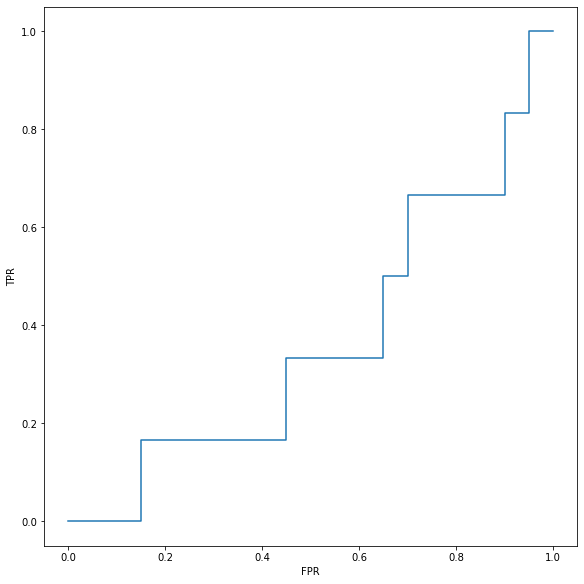

In [4]:
fpr, tpr, thresholds = metrics.roc_curve(x, y, pos_label=1)
print(fpr, tpr, thresholds)
auc = metrics.auc(fpr, tpr)
plt.figure(constrained_layout=True, figsize=(8, 8))
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [5]:
print(auc)

0.3666666666666667
